<a href="https://colab.research.google.com/github/punaevis/Thai-Payment-Channel-Migration-Analysis-2025/blob/main/Thai_Payment_Channel_Migration_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


In [12]:
#1 import data
df = pd.read_csv('/content/sample_data/payment_data.csv')
df = df[['year', 'digital_volume', 'traditional_volume']]


In [13]:
#2 Data Cleaning
for col in ['digital_volume', 'traditional_volume']:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '')
    df[col] = pd.to_numeric(df[col])


In [20]:
#3 Summary
digital_growth = ((df['digital_volume'].iloc[-1] - df['digital_volume'].iloc[0]) / df['digital_volume'].iloc[0]) * 100
trad_decline = ((df['traditional_volume'].iloc[-1] - df['traditional_volume'].iloc[0]) / df['traditional_volume'].iloc[0]) * 100

print("-" * 40)
print(f"Insights:")
print(f"Time Period: 2019 - 2024")
print('In the previous 5 years')
print(f"Digital Payment is growing to +{digital_growth:.2f}%")
print(f"While Traditional Channel is declining by {trad_decline:.2f}%")
print("-" * 40)


----------------------------------------
Insights:
Time Period: 2019 - 2024
In the previous 5 years
Digital Payment is growing to +549.65%
While Traditional Channel is declining by -65.72%
----------------------------------------


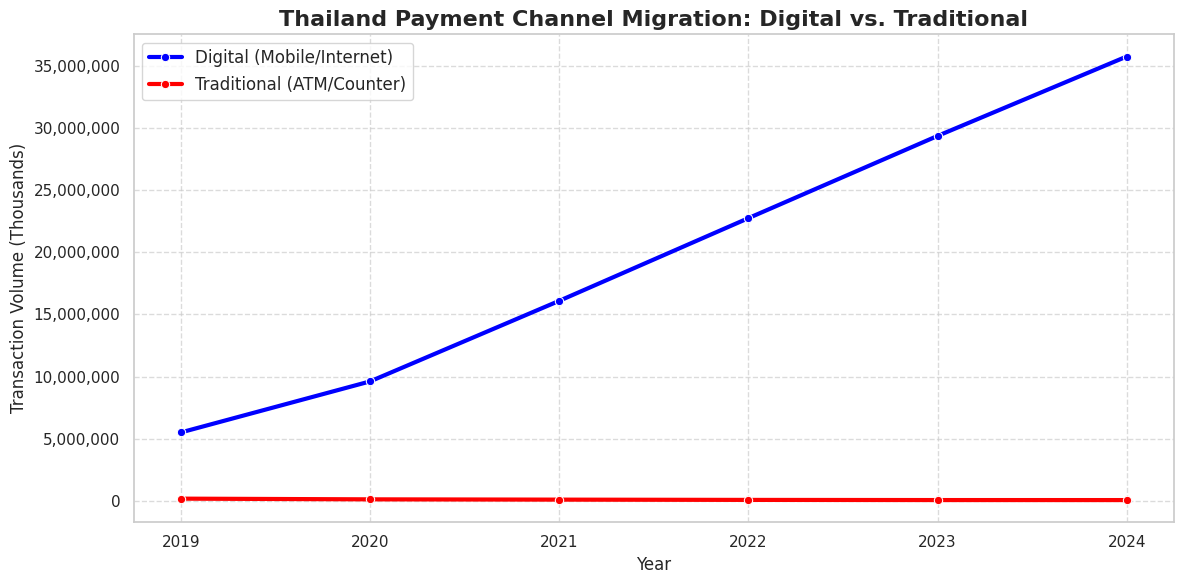

In [23]:
#4 Visualization
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

#digital
sns.lineplot(data=df, x='year', y='digital_volume', marker='o', linewidth=3, color='blue', label='Digital (Mobile/Internet)')

#traditional
sns.lineplot(data=df, x='year', y='traditional_volume', marker='o', linewidth=3, color='red', label='Traditional (ATM/Counter)')

#graph
plt.title('Thailand Payment Channel Migration: Digital vs. Traditional', fontsize=16, fontweight='bold')
plt.ylabel('Transaction Volume (Thousands)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(fontsize=12)

#add a thousand split
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()


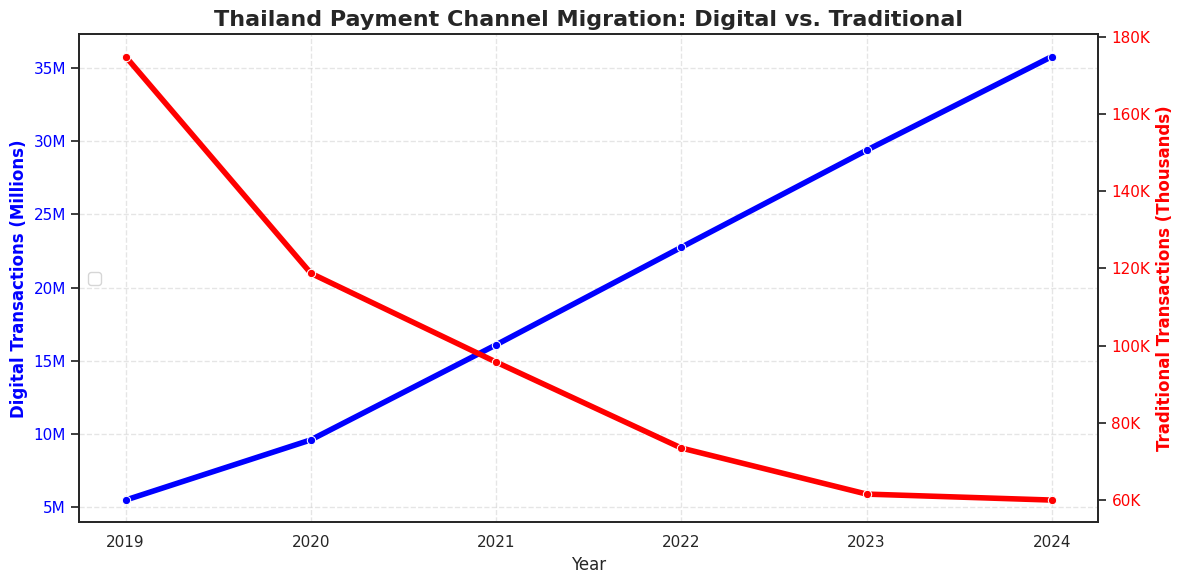

In [26]:
#dual axis graph (two axises are way too different in value)
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.set_theme(style="white")

#left axis digital
color_1 = 'blue'
sns.lineplot(data=df, x='year', y='digital_volume', ax=ax1, marker='o', linewidth=4, color=color_1)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Digital Transactions (Millions)', fontsize=12, color=color_1, fontweight='bold')
ax1.tick_params(axis='y', labelcolor=color_1)
# จัด Format แกนซ้ายเป็นหน่วย 'M' (Millions)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1_000_000:.0f}M'))

#right axis traditional
ax2 = ax1.twinx() #sharing same x-axis
color_2 = 'red'
sns.lineplot(data=df, x='year', y='traditional_volume', ax=ax2, marker='o', linewidth=4, color=color_2)
ax2.set_ylabel('Traditional Transactions (Thousands)', fontsize=12, color=color_2, fontweight='bold')
ax2.tick_params(axis='y', labelcolor=color_2)
#thousands unit
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1_000:.0f}K'))

#graph
plt.title('Thailand Payment Channel Migration: Digital vs. Traditional', fontsize=16, fontweight='bold')
ax1.grid(True, linestyle='--', alpha=0.5) # ใส่ Grid เฉพาะแกนหลักก็พอ

#legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', fontsize=12)

plt.tight_layout()
plt.savefig('payment_migration_dual_axis.png')
plt.show()